# Concevez une application au service de la santé publique 2: Analyse

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

Idées:

- ~~pie chart représentant les proportions typiques de fat, carbs, prots et fibers pour chaque pnns_group.~~
- ~~pie chart représentant les proportions typiques recommandées.~~
- ~~représenter les valeurs typiques de nutriscore pour chaque catégorie (+ ou - imposé)~~

- par catégorie de produit, regarder:
    - l'influence de la présence d'un macronutriment sur un autre/les autres
    - la conjonction entre nutriscore et quantités pour les différents macronutriments
- si on veut faire une sélection d'un combo One-dish meals+Milk and yogurt+Fruits, on peut repérer si il y a des combos typiques (à l'aide des catégories?)

Rappel de l'idée d'application: Réaliser une proposition de combo à partir d'un One-dish meal de manière à améliorer le ratio de macronutriments ingérés, en ajoutant un fruit et/ou un laitage au menu. 
1. L'application évalue l'écart entre les macronutriments présents et une valeur "idéale", basée sur les ANC
2. L'application, pour atteindre un meilleur ratio, propose alors de compléter le repas avec un laitage et/ou fruit
3. Ce faisant, l'application tente de maximiser les apports de fibres, et minimiser ceux de sel.
4. Enfin, pour deux produits équivalents, l'appliccation propose celui de meilleur nutriscore

# Sommaire
__[I Chargement du jeu de données](#I-Chargement-du-jeu-de-données)__  

__[II Analyse univariée](#II-Analyse-univariée)__  

[II.1 Répartition typique de l'énergie parmi les macronutriments](#II.1-Répartition-typique-de-l'énergie-parmi-les-macronutriments)\
[II.1.1 Répartition générale](#II.1.1-Répartition-générale)\
[II.1.2 Répartition par groupe d'aliment](#II.1.2-Répartition-par-groupe-d'aliment)\
[II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global](#II.1.3-Représentation-des-proportions-de-chaque-macronutriment-dans-le-bilan-global)\
[II.2 Distribution des valeurs du nutriscore](#II.2-Distribution-des-valeurs-du-nutriscore)\
[II.2.1 Distribution générale](#II.2.1-Distribution-générale)\
[II.2.2 Distribution sur chacune des catégorie d'aliment](#II.2.2-Distribution-sur-chacune-des-catégorie-d'aliment)\
[II.3 Résumés](#II.3-Résumés)\
[II.3.1 Distribution des macronutriments selon les groupes d'aliment et nutriscore](#II.3.1-Distribution-des-macronutriments-selon-les-groupes-d'aliment-et-nutriscore)\
[II.3.2 Distribution des groupes d'aliment par macronutriment et nutriscore](#II.3.2-Distribution-des-groupes-d'aliment-par-macronutriment-et-nutriscore)

__[III analyse bivariée](#III-Analyse-bivariée)__\
__[IV Analyse multivariée: ACP](#IV-Analyse-multivariée:-ACP)__

# I Chargement du jeu de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [2]:
df = pd.read_csv("./df_app1_clean.csv", )
df.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,...,1.0,2.7,21.2,3.6,4.50,27.50,False,NaN,4.50,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,...,-2.0,0.0,144.0,2.4,6.84,153.24,True,False,3.76,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,...,1.0,114.3,15.6,7.6,5.50,137.50,False,NaN,5.50,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,...,17.0,135.0,4.0,96.0,0.00,235.00,False,NaN,0.00,3
5,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,2.2,15.3,0.5,...,0.0,19.8,61.2,27.2,0.95,109.15,False,NaN,0.05,4


In [598]:
df.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,diff,f_na
count,22780.000000,33582.000000,29660.000000,29666.000000,29558.000000,13178.000000,29685.000000,28362.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000
mean,57.374890,133.534923,6.143240,13.525712,6.367347,1.732937,5.553402,2.823884,53.039173,56.698923,21.279802,2.735207,132.692585,0.842338,3.042969
std,28.399413,83.310847,7.148024,13.378446,10.072749,1.877616,5.406298,5.528968,61.692662,51.643390,21.043228,3.477330,83.209319,2.139960,1.195380
min,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.630000,0.000000
25%,39.000000,76.000000,1.600000,5.200000,1.200000,0.600000,2.400000,-1.000000,11.200000,24.000000,6.800000,0.200000,75.030000,-0.010000,3.000000
50%,59.000000,119.900000,4.000000,11.200000,3.000000,1.490000,4.300000,2.000000,35.100000,48.000000,16.500000,2.400000,119.000000,0.100000,3.000000
75%,80.000000,158.000000,8.000000,15.800000,9.300000,2.200000,7.300000,4.000000,67.500000,68.000000,28.000000,4.370000,157.107500,1.600000,4.000000
max,124.000000,900.000000,100.000000,98.400000,85.200000,45.500000,92.000000,34.000000,900.000000,393.600000,368.000000,300.000000,900.000000,8.100003,4.000000


On ne garde que les produits possédant le tag "en:yogurts" pour éviter d'avoir des produits laitiers no pertinents pour notre problème (crèmes fraîches etc.)

In [324]:
df.index = pd.Index(range(0, df.shape[0]))
X = df.copy()

# On commence par retirer les colonnes que nous n'allons pas utiliser
X.drop(columns=["fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "diff", "f_na", "e_nn", "out_e"], inplace=True)

# On ne récupère que les produits dont les categories_tags pour le groupe Milk and yogurt contiennent en:yogurt
# Sinon, on récupère aussi les crème fraîche, crème fouettées etc. qui faussent les valeurs nutritionnelles et
# ne sont pas considérées comme des produits intéressants du point du vue de notre application
may = X.groupby(["pnns_groups_2"]).get_group(("Milk and yogurt"))
yogurts = may.loc[may.apply(lambda x: x["categories_tags"].count("en:yogurts")==0, axis=1)]
drop_index = yogurts.index

# On retire les lignes correspondantes du dataframe
#X.drop(index=drop_index, inplace=True)
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.50,27.50
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.50,137.50
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.00,235.00
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15


In [325]:
X.describe()

,ecoscore_score_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
count,22780.000000,33582.000000,28362.000000,33582.000000,33582.000000,33582.000000,33582.000000,33582.000000
mean,57.374890,133.534923,2.823884,53.039173,56.698923,21.279802,2.735207,132.692585
std,28.399413,83.310847,5.528968,61.692662,51.643390,21.043228,3.477330,83.209319
min,-23.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,76.000000,-1.000000,11.200000,24.000000,6.800000,0.200000,75.030000
50%,59.000000,119.900000,2.000000,35.100000,48.000000,16.500000,2.400000,119.000000
75%,80.000000,158.000000,4.000000,67.500000,68.000000,28.000000,4.370000,157.107500
max,124.000000,900.000000,34.000000,900.000000,393.600000,368.000000,300.000000,900.000000


# II Analyse univariée

## II.1 Répartition typique de l'énergie parmi les macronutriments

### II.1.1 Répartition générale

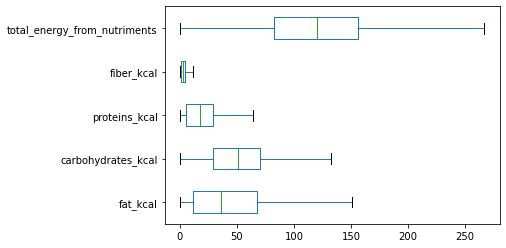

In [221]:
X[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutriments"]].plot(kind="box", vert=False, showfliers=False)
plt.show()

### II.1.2 Répartition par groupe d'aliment

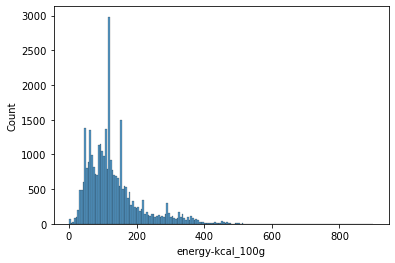

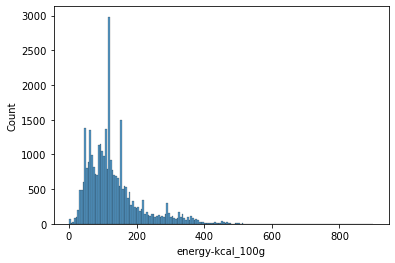

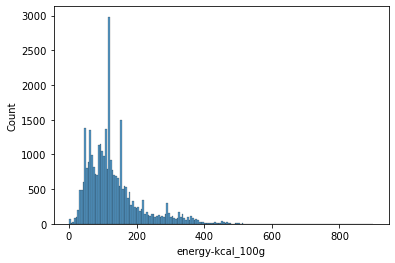

In [326]:
for pg in X.pnns_groups_2.unique():
    
    sns.histplot(x="energy-kcal_100g",
             data=X,
            )
    plt.show()

In [327]:
X["energy-kcal_100g"].max()

900.0

In [275]:
X.loc[X.apply(lambda x: x["energy-kcal_100g"]>119 and x["energy-kcal_100g"]<121, axis=1)]

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
10,Clémentines,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,NaN,NaN,119.9,NaN,11.2,99.8,3.6,5.3,119.9
28,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,81.0,b,119.9,NaN,11.2,99.8,3.6,5.3,119.9
57,Yaourt a boire,"en:beverages,en:dairies,en:fermented-foods,en:...",NaN,Milk and yogurt,17.0,e,120.1,NaN,28.2,61.7,28.5,1.7,120.1
64,Banane,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,80.0,b,119.9,NaN,11.2,99.8,3.6,5.3,119.9
80,Gala apples,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,84.0,b,119.9,NaN,11.2,99.8,3.6,5.3,119.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36328,Manzanas Rockit,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,108.0,b,119.9,NaN,11.2,99.8,3.6,5.3,119.9
36329,citrons,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,NaN,NaN,119.9,NaN,11.2,99.8,3.6,5.3,119.9
36353,Pâtes de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,43.0,c,119.9,NaN,11.2,99.8,3.6,5.3,119.9
36354,Pâtes de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,43.0,c,119.9,NaN,11.2,99.8,3.6,5.3,119.9


In [355]:
fruits = X.groupby("pnns_groups_2").get_group(("Fruits"))
fruits.loc[:, "second_to_last_tag"] = X.apply(lambda x: x["categories_tags"].split(",")[-2]
                                      if len(x.categories_tags.split(",")) > 1
                                      else x["categories_tags"].split(",")[0], axis=1)
fruits.loc[:, "last_tag"] = X.apply(lambda x: x["categories_tags"].split(",")[-1], axis=1)
fruits.sample(20)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,second_to_last_tag,last_tag
27731,Fraises,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,45.0,c,119.9,NaN,11.20,99.8,3.60,5.30,119.90,en:strawberries,en:fresh-strawberries
10819,Compote pomme abricot,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,54.0,-5.0,4.50,48.0,2.00,3.99,58.49,en:apple-compotes,fr:compotes-pommes-abricot
5178,Pom'Potes Pomme Brugnon,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,a,54.0,-4.0,4.50,44.0,2.00,2.47,52.97,en:apple-compotes,fr:compotes-pomme-brugnon
3664,Banane,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,95.0,b,119.9,NaN,11.20,99.8,3.60,5.30,119.90,en:tropical-fruits,en:bananas
2835,Banane République dominicaine,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,80.0,b,119.9,NaN,11.20,99.8,3.60,5.30,119.90,en:tropical-fruits,en:bananas
3420,Ananas,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,80.0,b,54.0,-3.0,2.16,45.2,2.08,4.60,49.44,en:tropical-fruits,en:pineapple
9643,Sans sucres ajoutes*,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,52.0,-5.0,2.70,44.0,2.00,4.75,53.45,en:fruits-based-foods,en:compotes
15928,Pomme Granny,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,123.0,b,119.9,NaN,11.20,99.8,3.60,5.30,119.90,en:fresh-apples,en:granny-smith-apples
62,Compote de pomme banane,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,90.0,a,77.0,-4.0,4.50,67.2,1.60,3.42,76.72,en:apple-compotes,fr:compotes-pommes-banane
27340,Compote pomme vanille,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,74.0,-3.0,0.00,68.0,1.20,3.42,72.62,en:apple-compotes,fr:compotes-pommes-vanille


In [356]:
fruits = pd.DataFrame.from_dict(fruits.groupby("last_tag").groups, orient="index")

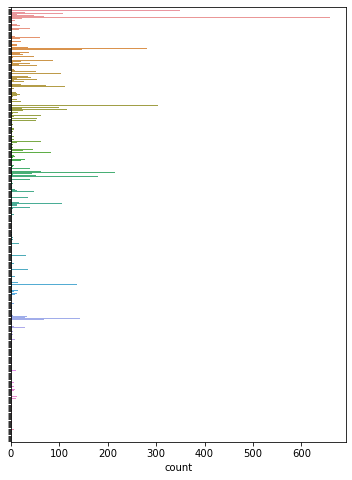

In [364]:
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(data=fruits.transpose(),
              orient="h",
              ax=ax)
ax.set_yticklabels("")
plt.show()

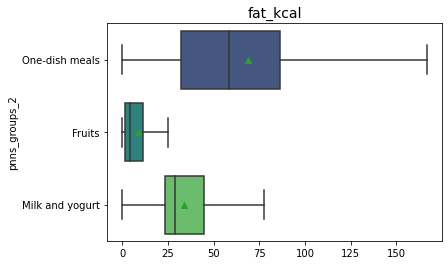

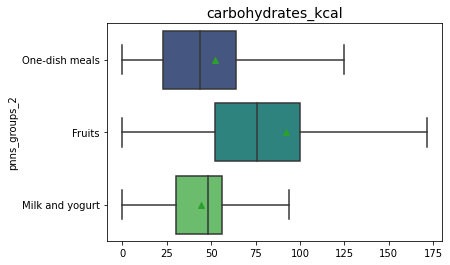

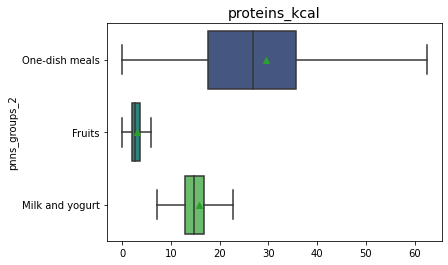

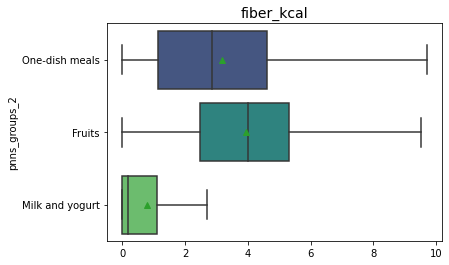

In [234]:
nutricols = ["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]
for c in nutricols:
    fig, ax1 = plt.subplots()
    sns.boxplot(x=c,
                y="pnns_groups_2",
                data=X,
                showfliers=False,
                showmeans=True,
                palette="viridis",
                ax=ax1)
    ax1.set_xlabel("")
    ax1.set_title(c, fontsize=14)
    plt.tight_layout
    plt.show()

### II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global

In [223]:
# On groupe les valeurs par catégorie d'aliment.
odm = X.groupby("pnns_groups_2")[["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]].mean()
odm.head()

,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
pnns_groups_2,,,,
Fruits,8.427442,92.277510,2.935280,3.949251
Milk and yogurt,33.808436,44.147764,15.689244,0.776212
One-dish meals,69.028105,52.246419,29.459496,3.190753


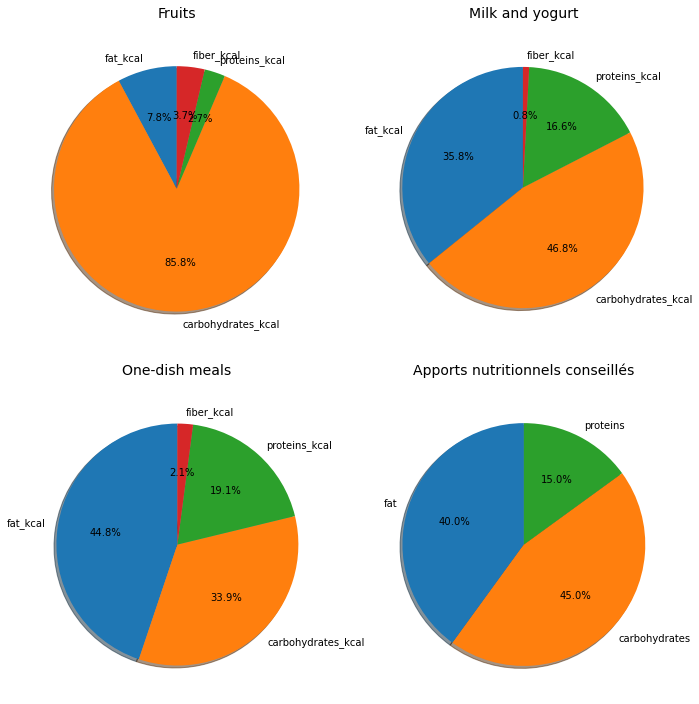

In [224]:
# Représentation sous forme de pie chart
anc = [40, 45, 15]
labels = ["fat", "carbohydrates","proteins"]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.pie(odm.loc["Fruits"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Fruits", pad=20, fontsize=14)

ax2.pie(odm.loc["Milk and yogurt"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Milk and yogurt", pad=20, fontsize=14)

ax3.pie(odm.loc["One-dish meals"], labels = odm.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("One-dish meals", pad=20, fontsize=14)

ax4.pie(anc, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Apports nutritionnels conseillés", pad=20, fontsize=14)


plt.tight_layout(pad=1.5)
plt.show()

## II.2 Distribution des valeurs du nutriscore

### II.2.1 Distribution générale

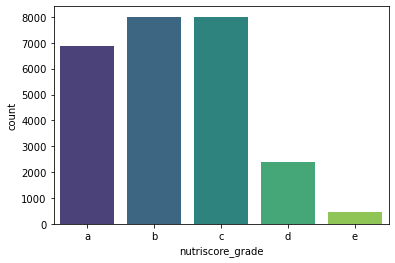

In [226]:
sns.countplot(x="nutriscore_grade",
            data=X.sort_values(by="nutriscore_grade"),
             palette="viridis")
plt.show()

### II.2.2 Distribution sur chacune des catégorie d'aliment

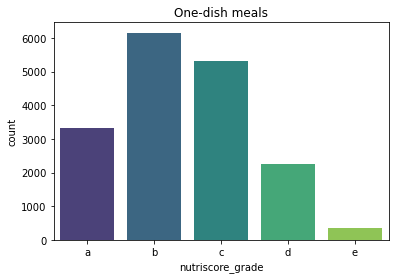

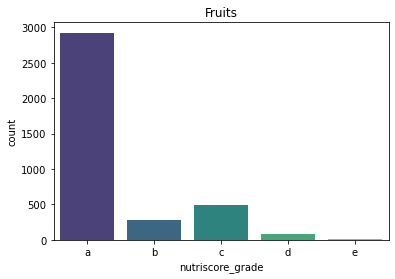

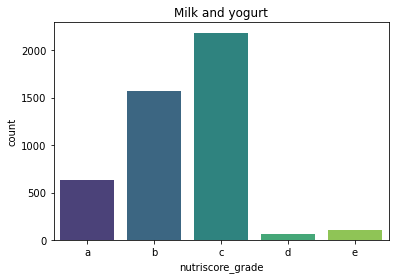

In [230]:
for pg in X.pnns_groups_2.unique():
    sns.countplot(x="nutriscore_grade",
                  data=X.loc[X.pnns_groups_2==pg].dropna(subset=["nutriscore_grade"]).sort_values(by=["nutriscore_grade"]),
                  palette="viridis"
                 )
    plt.title(pg)
    plt.show()

## II.3 Résumés

### II.3.1 Distribution des macronutriments selon les groupes d'aliment et nutriscore

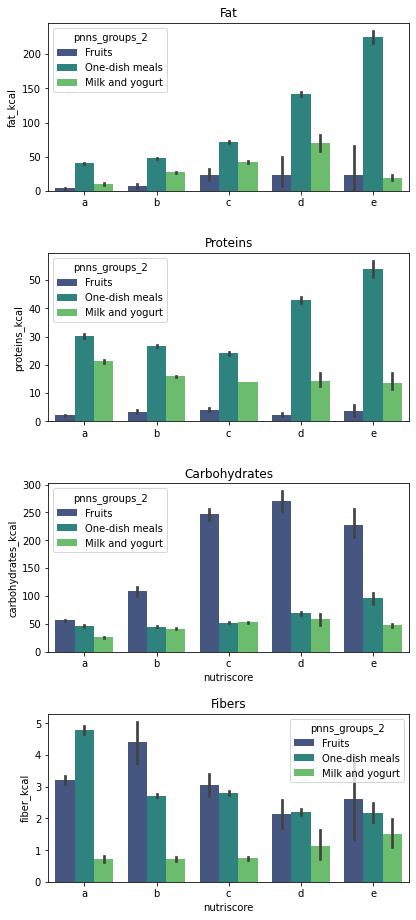

In [238]:
fig, ((ax1, ax2 ,ax3, ax4)) = plt.subplots(nrows=4, figsize=(6, 13))

sns.barplot(x="nutriscore_grade",
            y='fat_kcal',
            data=X.sort_values(by="nutriscore_grade"),
            palette="viridis",
            hue="pnns_groups_2",
            ax=ax1
           )
ax1.set_title("Fat")
ax1.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="proteins_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax2
           )
ax2.set_title("Proteins")
ax2.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="carbohydrates_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax3
           )
ax3.set_title("Carbohydrates")
ax3.set_xlabel("nutriscore")

sns.barplot(x="nutriscore_grade",
              y="fiber_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax4
           )
ax4.set_title("Fibers")
ax4.set_xlabel("nutriscore")


plt.tight_layout(pad=1.5)
plt.show()

### II.3.2 Distribution des groupes d'aliment par macronutriment et nutriscore

In [232]:
# On commence par regrouper les données par catégorie d'aliment
cat_nutri = X.groupby(["pnns_groups_2"])[["nutriscore_grade","fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]]

## On va transformer le dataset de manière à pouvoir traiter les données comme s'il s'agissait
## de trois variables différentes: nutriscore, type de nutriment, et energie associée à chaque nutriment, au lieu
## des 5 variables: nutriscore_grade, fat_kcal, carbohydrates_kcal etc. 

## Exemple pour la catégorie "One-dish meals"
# Récupération des données associées au groupe
y = cat_nutri.get_group(("One-dish meals")).dropna(subset=["nutriscore_grade"])

# transformation du dataframe au format "long", c'est-à-dire une variable/colonne
y_long = y.melt(id_vars=["nutriscore_grade"], var_name="nutrient_type", value_name="nutrient_energy")
y_long.head()

,nutriscore_grade,nutrient_type,nutrient_energy
0,b,fat_kcal,2.7
1,b,fat_kcal,114.3
2,d,fat_kcal,135.0
3,b,fat_kcal,19.8
4,b,fat_kcal,37.8


Cela correspond au format souhaité. On va automatiser ce traitement pour effectuer la visualisation.

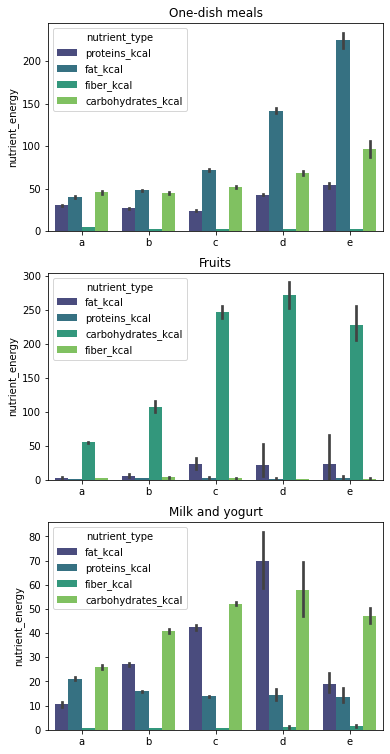

In [233]:
## Affichage des données sous forme de barplot pour chaque catégorie et chaque nutriscore

fig, axs = plt.subplots(nrows=3, figsize=(6, 13))

for i, pg in enumerate(X.pnns_groups_2.unique()):
    y = cat_nutri.get_group(pg).dropna(subset=["nutriscore_grade"])
    y_long = y.melt(id_vars=["nutriscore_grade"], var_name="nutrient_type", value_name="nutrient_energy")
    sns.barplot(x="nutriscore_grade",
                y='nutrient_energy',
                data=y_long.sort_values(by="nutriscore_grade"),
                palette="viridis",
                hue="nutrient_type",
                ax=axs[i]
               )
    axs[i].set_title(pg)
    axs[i].set_xlabel("")
    plt.tight_layout

plt.show()

### II.3.3 Distribution des nutriscores par groupe d'aliment et macronutriments

# III Analyse bivariée

In [70]:
X.groupby(["pnns_groups_2", "nutriscore_grade", "categories_tags"]).get_group(("Milk and yogurt", "d", ""))

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
90,West country luxury yogurt lemon and lemon curd,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,54.0,c,169.0,11.0,72.900000,81.6,13.2,1.300,167.700000
247,Greek yogurt plain,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,NaN,NaN,80.0,11.0,0.000000,24.0,60.0,0.000,84.000000
280,West Country Luxury Yogurt - Lemon & Lime curd,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,54.0,c,169.0,11.0,72.900000,81.6,13.2,1.520,169.220000
307,Lemon fruit fool,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,NaN,NaN,209.0,15.0,105.300000,94.0,10.0,0.931,210.231000
339,British double cream,"en:dairies,en:creams",d,Milk and yogurt,57.0,c,445.0,15.0,427.500000,10.4,6.8,0.000,444.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36303,Tatua Dairy Whip Cream Whipped Gluten free,"en:dairies,en:creams,en:whipped-creams,fr:crem...",d,Milk and yogurt,55.0,c,293.0,16.0,243.000000,34.8,13.6,1.600,291.400000
36304,Chocolat mousse,"en:dairies,en:desserts,en:creams,en:chocolate-...",d,Milk and yogurt,20.0,d,282.3,16.0,207.900000,65.2,9.2,0.000,282.300000
36313,Crème fouettée,"en:dairies,en:creams,en:whipped-creams",d,Milk and yogurt,55.0,c,342.0,14.0,324.899986,12.4,9.6,0.000,346.899986
36315,Meadow Fresh Whipping Cream 1L,"en:dairies,en:creams,en:whipped-creams",d,Milk and yogurt,55.0,c,340.0,14.0,324.000000,12.4,8.8,0.000,345.200000


Il va falloir affiner les sélections ici... Ne pas garder tout ce qui est "crème fouettée" par exemple. Surement crème fraîche aussi.

In [436]:
X.loc[X.product_name=="Greek yogurt plain", "categories_tags"].to_numpy()

array(['en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:greek-style-yogurts',
       'en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:plain-yogurts,en:cow-milk-yogurts,en:greek-style-yogurts,en:plain-greek-style-yogurts'],
      dtype=object)

In [316]:
may = X.groupby(["pnns_groups_2"]).get_group(("Milk and yogurt"))

In [317]:
may.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score
6,Yaourt fermier Pur chèvre,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,108.3,NaN,52.7,38.0,16.5,1.1,108.3,0.486611,0.350877,0.152355,0.605417
17,Yaourt brasse aux fruits,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,108.3,NaN,52.7,38.0,16.5,1.1,108.3,0.486611,0.350877,0.152355,0.605417
37,Yaourt nature brebis,"en:dairies,en:fermented-foods,en:fermented-mil...",a,Milk and yogurt,NaN,NaN,44.0,-3.0,0.9,17.2,25.2,0.7,43.3,0.020455,0.390909,0.572727,0.277012
38,Yaourt au lait de brebis bio Nature,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,108.3,NaN,52.7,38.0,16.5,1.1,108.3,0.486611,0.350877,0.152355,0.605417
39,Yaourt de brebis vanille,"en:dairies,en:fermented-foods,en:fermented-mil...",b,Milk and yogurt,NaN,NaN,85.0,1.0,25.2,40.0,20.0,0.0,85.2,0.295775,0.469484,0.234742,0.430446


In [318]:
may.categories_tags.value_counts().sort_values(ascending=False)

en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts                                                                                                                                                                    467
en:dairies,en:milks                                                                                                                                                                                                                    467
en:dairies,en:milks,en:homogenized-milks,en:semi-skimmed-milks,en:uht-milks                                                                                                                                                            360
en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:plain-yogurts                                                                                                                                                   257
en:dairies,en:milks,en:semi-skimmed-milks                   

tags les plus représentées?

Ne récupérons que les produits inclus dans la catégorie "en:yogurts"

In [319]:
yogurts = may.loc[may.apply(lambda x: x["categories_tags"].count("en:yogurts")!=0, axis=1)]

In [320]:
yogurts.shape

(4966, 17)

In [321]:
yogurts.dropna(subset=["nutriscore_grade"]).shape

(4547, 17)

In [322]:
yogurts.nutriscore_grade.value_counts()

c    2185
b    1567
a     634
e     103
d      58
Name: nutriscore_grade, dtype: int64

In [106]:
nutri_yogurts = yogurts[["nutriscore_grade","fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]]
nutri_yogurts_long = nutri_yogurts.melt(id_vars="nutriscore_grade", var_name="nutrient_type", value_name="nutrient_energy")

<AxesSubplot:xlabel='nutriscore_grade', ylabel='nutrient_energy'>

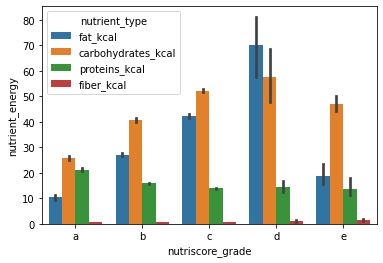

In [107]:
sns.barplot(x="nutriscore_grade",
            y="nutrient_energy",
            data=nutri_yogurts_long,
            hue="nutrient_type"
           )

Beaucoup mieux!

Il va falloir faire ce traitement dans la partie nettoyage.

On retire lignes pour lesquelles toutes les valeurs sont nulles

In [328]:
zeros = X[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].sum(axis=1)==0
drop_index = zeros[zeros].index

X.drop(index=drop_index, inplace=True)

In [329]:
X.loc[:, "fat_ratio"] = X.apply(lambda x: x["fat_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)
X.loc[:, "carbohydrates_ratio"] = X.apply(lambda x: x["carbohydrates_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)
X.loc[:, "proteins_ratio"] = X.apply(lambda x: x["proteins_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)

In [330]:
def score(fat, carbs, proteins, method="abs"):
    if method=="abs":
        return np.abs(fat-0.35) + np.abs(carbs-0.4) + np.abs(proteins-0.15)
    elif method=="sq":
        return np.sqrt((fat-0.35**2) + (carbs-0.4)**2 + (proteins-0.15)**2)

sc = score(X["fat_ratio"], X["carbohydrates_ratio"], X["proteins_ratio"], method="sq")

/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [331]:
X.loc[:, "score"] = sc
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.50,27.50,0.084375,0.662500,0.112500,0.179409
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24,0.000000,0.939702,0.015662,0.432233
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.50,137.50,0.799301,0.109091,0.053147,0.877957
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.00,235.00,0.574468,0.017021,0.408511,0.815763
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15,0.181402,0.560696,0.249198,0.307515


<AxesSubplot:xlabel='score', ylabel='Count'>

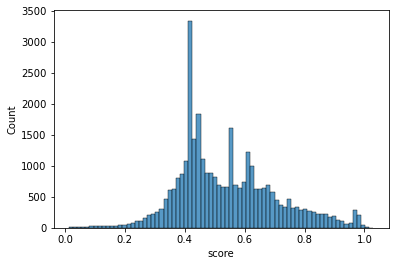

In [332]:
sns.histplot(x="score",
            data=X
           )

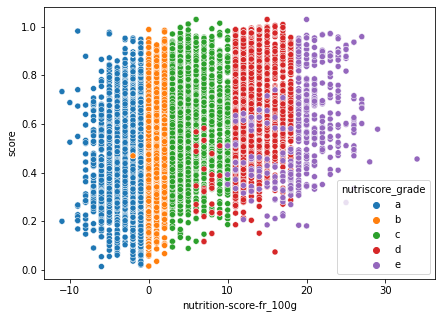

In [338]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="nutrition-score-fr_100g",
                y="score",
                data=X.sort_values(by="nutriscore_grade"),
                hue="nutriscore_grade"
               )
plt.show()

Certains produits ont un nutrition-score-fr_100g et un nutriscore_grade qui ne correspondent pas.

# IV Analyse multivariée: ACP

**Question: peut-on synthétiser nos variables nutritionnelles? Sont-elles corrélées entre elles?**

ACP:
- La variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre individus (un individu= un produit ici)

- Les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?

**On analyse les relations entre les variables \["energy-kcal_100g", "nutrition-score-fr_100g","fat_ratio","carbohydrates_ratio","proteins_ratio", "score", "fiber_kcal"\]**

In [163]:
# critère pour le nombre de composantes
print("On ne garde que les axes portant au moins {:.2f}% d'inertie.".format(100/7)) 

On ne garde que les axes portant au moins 14.29% d'inertie.


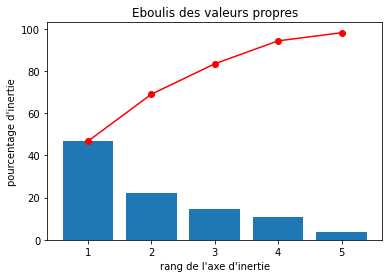

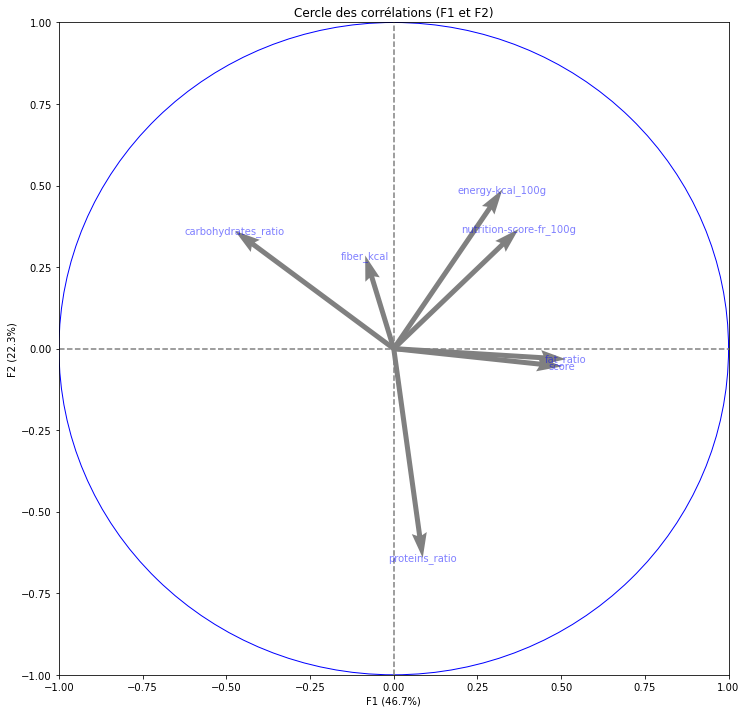

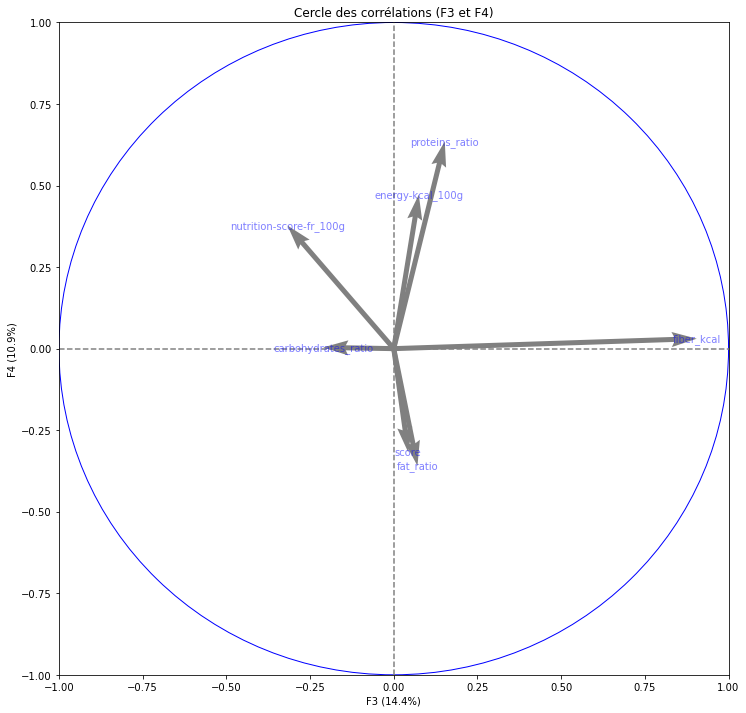

In [339]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# On ne récupère que les lignes pour lesquelles nutrition-score-fr_100g est renseignée.
y = X.loc[X["nutrition-score-fr_100g"].notna()]
y.index = pd.Index(range(0, y.shape[0]))

# On ne garde que les colonnes à prendre en compte dans l'ACP (c'est-à-dire les colonnes de valeurs numériques)
df_acp = y[["energy-kcal_100g", "nutrition-score-fr_100g",
            "fat_ratio","carbohydrates_ratio","proteins_ratio", "score", "fiber_kcal"]].dropna(subset=["score"])

features = df_acp.columns
index = y.index

# choix du nombre de composantes à calculer
n_comp = 5

# Centrage et RéductionS
std_scale = preprocessing.StandardScaler().fit(df_acp)
X_scaled = std_scale.transform(df_acp)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [340]:
def print_acp_analysis(df=df_acp, pca=pca):
    print("\nF1 donné par :\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[0])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))
    print("\nF2 donné par:\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[1])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))
    print("\nF3 donné par:\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[2])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))

In [341]:
print_acp_analysis()


F1 donné par :

fat_ratio 0.51
score 0.50
nutrition-score-fr_100g 0.37
energy-kcal_100g 0.32
proteins_ratio 0.09
fiber_kcal -0.09
carbohydrates_ratio -0.47

F2 donné par:

energy-kcal_100g 0.49
nutrition-score-fr_100g 0.37
carbohydrates_ratio 0.36
fiber_kcal 0.29
fat_ratio -0.03
score -0.05
proteins_ratio -0.64

F3 donné par:

fiber_kcal 0.91
proteins_ratio 0.15
energy-kcal_100g 0.07
fat_ratio 0.07
score 0.04
carbohydrates_ratio -0.21
nutrition-score-fr_100g -0.32


Le premier axe d'inertie est principalement corrélé à "fat_ratio", "score", et dans une moindre mesure "nutrition-score-fr_100g" puis "energy-kcal_100g". Il est anticorrélé à "carbohydrates_ratio".

Le deuxième axe est principalement corrélé à "energy-kcal_100g", et dans une moindre mesure "nutrition-score-fr_100g" et "carbohydrates_ratio". Il est anticorrélé à "proteins_ratio".

Le troisième axe est principalement corrélé à "fiber_kcal", et anticorrélé, mais dans une moindre mesure à "nutrition-score-fr_100g"

On a donc trois groupes de variables:
- les variables \[fat, score, nutrition-score-fr_100g, energy-kcal_100g\]. A noter que plus le nutrition-score est élevé, moins il est "bon". Ainsi, les produits de haut F1 sont des produits gras, de "mauvais" score c'est-à-dire s'éloignant des recommandations, énergétiques et de "mauvais" nutriscore. Clairement, le premier axe est celui en rapport avec la (haute) valeur énergétique associée aux lipides.
- les variables \[energy, nutrition-score, carbohydrates, proteins\] d'autre part. Ce deuxième regroupement renseigne sur les produits de haute valeur énergétique associée aux glucides et pauvres en protéines.
- la variable "fiber_kcal" est "seule" dans son groupe, avec une légère association négative avec le nutrition-score-fr_100g. Le troisième axe nous renseigne donc sur les produits à haute teneur en fibres, toutes choses égales par ailleurs. Il nous indique également que plus un produit contient des fibres, plus son nutrition-score-fr_100g a des chances d'être bas.

Calculons les coefficients de corrélation des différentes variables pour confirmer/infirmer les résultats de l'ACP

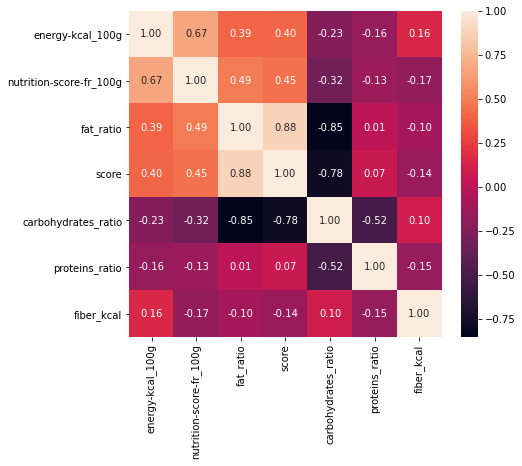

In [191]:
plt.figure(figsize=(7, 6))
corr = y[["energy-kcal_100g",
          "nutrition-score-fr_100g",
          "fat_ratio",
          "score",
          "carbohydrates_ratio",
          "proteins_ratio", 
          "fiber_kcal"]].dropna(subset=["score"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Quelques enseignements qu'on peut tirer de la matrice des corrélations:
- les blocs ("energy-kcal_100g", "nutrition-score-fr_100g") d'une part, et ("fat_ratio", "score") d'autre part, constituent des blocs de variables très corrélées les unes aux autres. Ces deux blocs possèdent par ailleurs des corrélations non négligeables entre eux. Donc en général, un produit qui possède une haute valeur énergétique possède aussi un haut nutrition-score-fr_100g, et un produit de haut fat_ratio possède un haut score. Par ailleurs, il existe en tendance associant un haut "score" et une haute valeur énergétique, avec tout ce que ça implique concernant les autres variables mentionnées ici.  
- la variable "carbohydrates_ratio" est très anticorrélée au bloc ("fat_ratio", "score"): un produit possède soit un fat_ratio élevé, soit un carbohydrates_ratio élevé, et son score est moins élevé (meilleur) dans ce dernier cas.
- les autres variables ne sont pas ou peu corrélées avec les blocs mentionnés ci-dessus.

**Affichons maintenant les projections des individus (produits) dans les deux premiers plans factoriel**

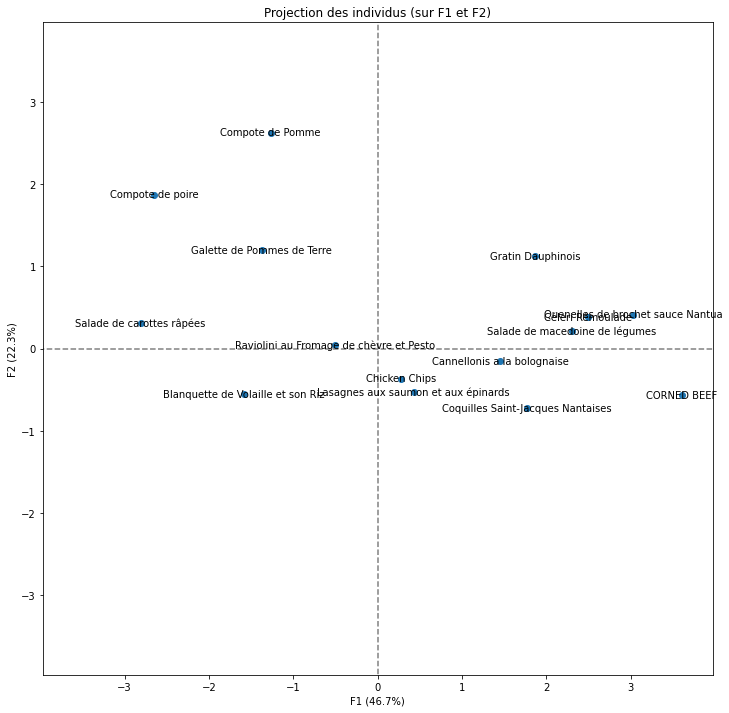

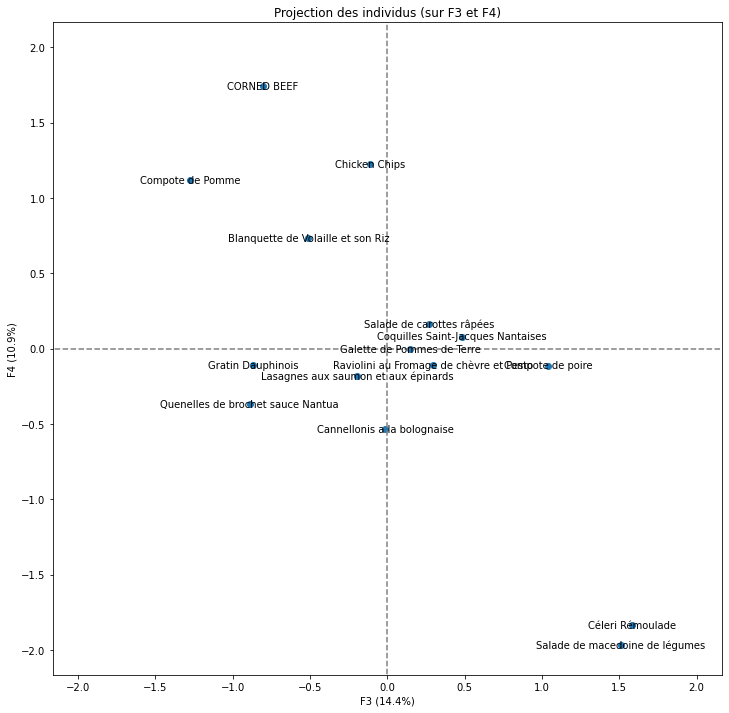

In [213]:
# Projections des individus
id = index[:15]
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected[id], n_comp, pca, [(0,1),(2,3)], labels=y.iloc[id]["product_name"].to_numpy())

In [214]:
y.iloc[id]["product_name"]

0                   Salade de carottes râpées
1                            Compote de poire
2              Salade de macedoine de légumes
3                                 CORNED BEEF
4           Blanquette de Volaille et son Riz
5     Raviolini au Fromage de chèvre et Pesto
6                            Compote de Pomme
7                            Céleri Rémoulade
8                  Galette de Pommes de Terre
9                               Chicken Chips
10        Lasagnes aux saumon et aux épinards
11                          Gratin Dauphinois
12          Coquilles Saint-Jacques Nantaises
13                Cannellonis a la bolognaise
14          Quenelles de brochet sauce Nantua
Name: product_name, dtype: object

In [241]:
def print_product_analysis(df, X_proj, id1, id2, axe=1):
    
    prod1 = dict()
    prod2 = dict()
    
    # Récupération du nom des produits à partir des index
    prod1["name"] = df.iloc[id1]["product_name"]
    prod2["name"] = df.iloc[id2]["product_name"]
    
    # analyse selon l'axe choisi
    if axe==1:
        print("Pour deux produits de F1 différents:\n")
    elif axe==2:
        print("Pour deux produits de F2 différents:\n")
    elif axe==3:
        print("Pour deux produits de F3 différents:\n")
    
    # Variables conservées pour l'analyse
    var = ["energy-kcal_100g",
           "fat_ratio", 
           "carbohydrates_ratio",
           "proteins_ratio",
           "fiber_kcal",
           "score",
           "nutrition-score-fr_100g"]
    
    
    # Valeur basse vs. valeur élevée pour l'axe
    prod1["val"] = X_proj[id1, axe-1]
    prod2["val"] = X_proj[id2, axe-1]
    text1 = "Valeur basse"
    text2 = "Valeur élevée"
    
    if prod1["val"] < prod2["val"]:
        prod1["text"] = text1
        prod2["text"] = text2
    else:
        prod1["text"] = text2
        prod2["text"] = text1
    
    # Affichage de l'analyse
    print(f"Premier produit: {prod1['name']} ({prod1['text']}):")
    print(df.iloc[id1][var])
    print("-"*40)
    print(f"Deuxième produit: {prod2['name']} ({prod2['text']}):")
    print(df.iloc[id2][var])

In [242]:
print_product_analysis(y, X_projected, 0, 7, axe=1)

Pour deux produits de F1 différents:

Premier produit: Salade de carottes râpées (Valeur basse):
energy-kcal_100g                 32
fat_ratio                  0.084375
carbohydrates_ratio          0.6625
proteins_ratio               0.1125
fiber_kcal                      4.5
score                      0.179409
nutrition-score-fr_100g           1
Name: 0, dtype: object
----------------------------------------
Deuxième produit: Céleri Rémoulade (Valeur élevée):
energy-kcal_100g                 145
fat_ratio                   0.806897
carbohydrates_ratio        0.0965517
proteins_ratio             0.0551724
fiber_kcal                         6
score                       0.886267
nutrition-score-fr_100g            3
Name: 7, dtype: object


**On retrouve donc le fait que le produit de F1 plus élevé (à F2 identique) est plus énergétique et gras et contient moins de glucides**

In [243]:
print_product_analysis(y, X_projected, 4, 6, axe=2)

Pour deux produits de F2 différents:

Premier produit: Blanquette de Volaille et son Riz (Valeur basse):
energy-kcal_100g              109.2
fat_ratio                  0.181402
carbohydrates_ratio        0.560696
proteins_ratio             0.249198
fiber_kcal                     0.95
score                      0.307515
nutrition-score-fr_100g           0
Name: 4, dtype: object
----------------------------------------
Deuxième produit: Compote de Pomme (Valeur élevée):
energy-kcal_100g                 377
fat_ratio                  0.0117647
carbohydrates_ratio         0.972549
proteins_ratio             0.0156863
fiber_kcal                         0
score                       0.484889
nutrition-score-fr_100g            1
Name: 6, dtype: object


**On retrouve donc le fait que le produit de F2 plus élevé (à F1 identique) est plus énergétique, contient plus de glucides et moins de protéines**

In [244]:
print_product_analysis(y, X_projected, 7, 14, axe=3)

Pour deux produits de F3 différents:

Premier produit: Céleri Rémoulade (Valeur élevée):
energy-kcal_100g                 145
fat_ratio                   0.806897
carbohydrates_ratio        0.0965517
proteins_ratio             0.0551724
fiber_kcal                         6
score                       0.886267
nutrition-score-fr_100g            3
Name: 7, dtype: object
----------------------------------------
Deuxième produit: Quenelles de brochet sauce Nantua (Valeur basse):
energy-kcal_100g                140
fat_ratio                  0.713514
carbohydrates_ratio        0.147027
proteins_ratio             0.132613
fiber_kcal                     0.95
score                      0.809513
nutrition-score-fr_100g          16
Name: 14, dtype: object


**On retrouve donc le fait que le produit de F3 plus élevé (à F1 et F2 identiques ou presque) contient plus de fibres et possède un nutrition-score-fr_100g moins élevé**

# V Hypothèses

Nous allons formuler l'hypothèse suivante: la répartition des macronutriments dépend significativement du groupe auquel appartient le produit.

Trois groupes: "One-dish meals", "Milk and yogurt", "Fruits

<AxesSubplot:xlabel='pnns_groups_2', ylabel='count'>

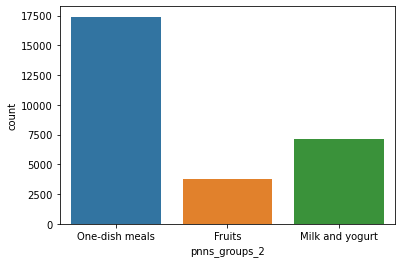

In [371]:
sns.countplot(x="pnns_groups_2",
              data=y
             )

# VI Réduction dimensionnelle: KNN

Peut-on regrouper nos produits en clusters? plotter par exemple score vs macronutriment, avec hue="cluster"

In [342]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 5



# préparation des données pour le clustering
#data = X.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
#X_scaled = preprocessing.StandardScaler().fit_transform(df_acp)

# Clustering par K-means
km = KMeans(n_clusters=n_clust, n_init=100)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

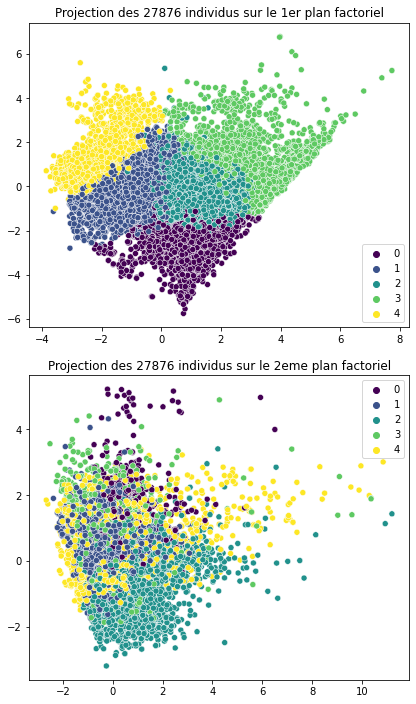

In [343]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 10))
# Affichage du clustering par projection des individus sur le premier plan factoriel
#pca = decomposition.PCA(n_components=4).fit(df_acp)
#X_projected = pca.transform(df_acp)
sns.scatterplot(x=X_projected[:, 0], 
                y=X_projected[:, 1], 
                data=X_projected, 
                hue=clusters, 
                palette="viridis",
                ax=ax1)
ax1.set_title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

sns.scatterplot(x=X_projected[:, 2], 
                y=X_projected[:, 3], 
                data=X_projected,
                hue=clusters, 
                palette="viridis", 
                ax=ax2)
ax2.set_title("Projection des {} individus sur le 2eme plan factoriel".format(X_projected.shape[0]))

plt.tight_layout(pad=1.5)
plt.show()

In [408]:
z = y.dropna(subset=["score"]).copy()
z.loc[:, "cluster"] = clusters
z.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score,cluster
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.50,27.50,0.084375,0.662500,0.112500,0.179409,4
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24,0.000000,0.939702,0.015662,0.432233,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.50,137.50,0.799301,0.109091,0.053147,0.877957,2
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.00,235.00,0.574468,0.017021,0.408511,0.815763,3
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15,0.181402,0.560696,0.249198,0.307515,1


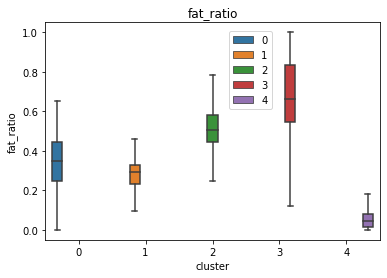

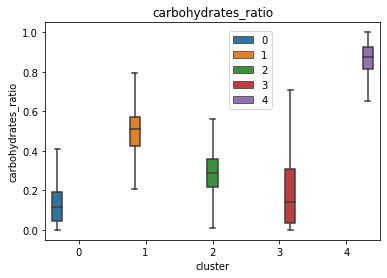

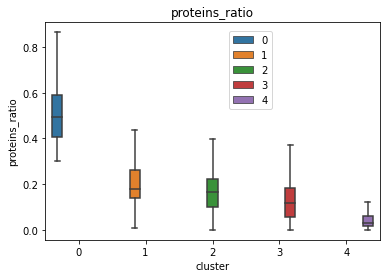

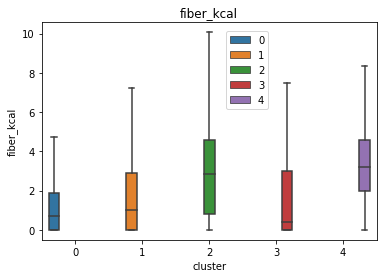

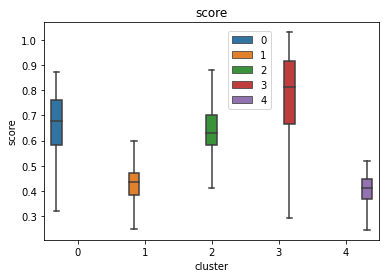

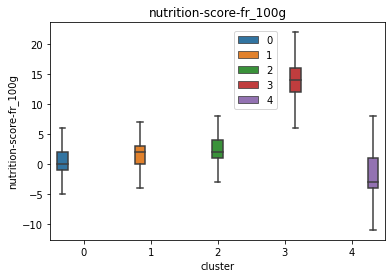

In [422]:
for c in ["fat_ratio", "carbohydrates_ratio", "proteins_ratio", "fiber_kcal", "score", "nutrition-score-fr_100g"]:
    fig, ax = plt.subplots()
    sns.boxplot(x="cluster",
            y=c,
            data=z.sort_values(by=c),
            hue="cluster",
            showfliers=False
         )
    ax.legend(loc=(0.55, 0.6))
    plt.title(c)
    plt.show()

Comment peut-on caractériser chaque cluster plus précisément? 

In [345]:
# Regroupement par cluster et calcul des moyennes des valeurs nutritionnelles
z_clusters = z.groupby("cluster")

In [409]:
z_clusters[["fat_ratio", "score", "fiber_kcal", "carbohydrates_ratio", "nutrition-score-fr_100g"]].mean().sort_values(by=["score", "fiber_kcal"])

,fat_ratio,score,fiber_kcal,carbohydrates_ratio,nutrition-score-fr_100g
cluster,,,,,
4,0.059975,0.400246,3.693606,0.849939,-0.732085
1,0.277107,0.419460,1.683374,0.505244,1.848221
2,0.524467,0.651113,3.072011,0.284149,2.543215
0,0.339233,0.663034,1.230419,0.127496,0.560434
3,0.677482,0.783542,1.714042,0.185271,14.184434


hypothèse: chaque cluster est associé significativement avec le score.

In [418]:
X = "cluster"
Y = "nutriscore_grade"

cont = z[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutriscore_grade,a,b,c,d,e,Total
cluster,,,,,,
0,714,893,254,74,1,1936
1,1659,4425,2846,233,140,9303
2,1285,3274,4096,246,31,8932
3,4,6,268,2407,373,3058
4,3170,638,662,150,27,4647
Total,6832,9236,8126,3110,572,27876


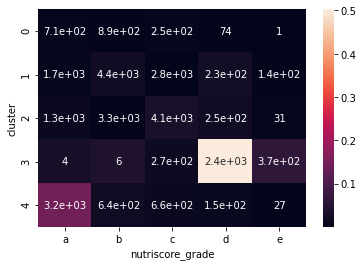

In [421]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(z)
indep = tx.dot(ty) / n

#c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

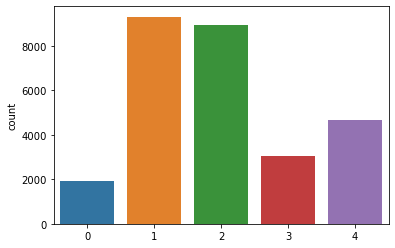

In [351]:
sns.countplot(x=clusters)
plt.show()

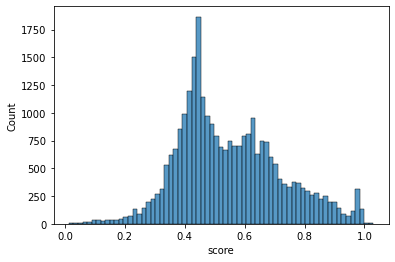

In [352]:
sns.histplot(x="score",
             data=z
            )
plt.show()

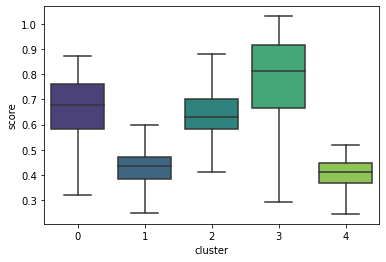

In [363]:
sns.boxplot(x="cluster",
            y="score",
            data=z.sort_values(by="cluster"),
            showfliers=False,
            palette="viridis"
           )

plt.show()

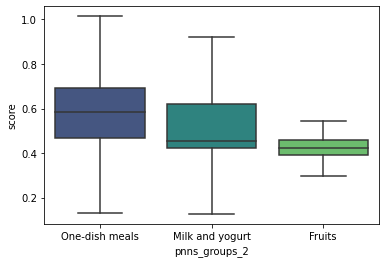

In [366]:
sns.boxplot(x="pnns_groups_2",
            y="score",
            data=z.sort_values(by="cluster"),
            showfliers=False,
            palette="viridis"
           )
plt.show()

In [433]:
from scipy import stats


# 1. Etude quantitative de la significativité du score moyen pour les groupes d'aliments
# Constitution des échantillons associés à chacun de ces groupes
odm = y.groupby("pnns_groups_2").get_group("One-dish meals")["score"]
may = y.groupby("pnns_groups_2").get_group("Milk and yogurt")["score"]
fru = y.groupby("pnns_groups_2").get_group("Fruits")["score"]

N_odm = odm.shape[0]
N_may = may.shape[0]
N_fru = fru.shape[0]

# nombre d'échantillons
k = 2

# Nombre total d'individus
N = pd.concat([may, fru]).shape[0]

# Degrés de liberté "between", "within" et "total"
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

# SStotal
#SStotal = (y["score"]**2).sum() - (y["score"].sum())**2/N
SStotal = (pd.concat([may, fru])**2).sum() - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)

# SSwitihin


ss_odm = (odm**2).sum() - (odm.sum())**2/N_odm
ss_may = (may**2).sum() - (may.sum())**2/N_may
ss_fru = (fru**2).sum() - (fru.sum())**2/N_fru

SSwithin = ss_may + ss_fru #+ ss_fru

# SSbetween
#SSbetween1 = (odm.sum())**2/N_odm + (may.sum())**2/N_may + (fru.sum())**2/N_fru - (y["score"].sum())**2/N
SSbetween1 = (fru.sum())**2/N_fru + (may.sum())**2/N_may - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)

SSbetween2 = SStotal - SSwithin

# MSbetween
MSbetween = SSbetween1/DFbetween

# MSwithin
MSwithin = SSwithin/DFwithin

#F
F = MSbetween/MSwithin

# p-valeur
p = stats.f.sf(F, DFbetween, DFwithin)

# Verification de l'hypothèse de variance égale entre les groupes
print(ss_odm, ss_may, SStotal, SSbetween1, SSbetween2, SSwithin)

print(N_odm, N_may, N, MSwithin, MSbetween, F, p)

508.2861059403285 321.9013010645515 371.6290032071379 18.435770942653107 18.435770942653562 353.1932322644843
17400 7171 10930 0.03232002491439278 18.435770942653107 570.4132651965647 6.235571584669618e-123


In [432]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('cluster ~ fat_ratio',
                data=z).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq       df           F         PR(>F)
fat_ratio    678.936379      1.0  498.151865  2.183589e-109
Residual   37989.765695  27874.0         NaN            NaN
